### Importing  Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##Loading Data

In [ ]:
data=pd.read_csv('/content/Fraud.csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Data exploration

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
# Print the last 5 rows of the data
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1536875,153,CASH_OUT,202884.62,C1824107879,50955.0,0.0,C1534027199,1983635.19,2186519.81,0.0,0.0
1536876,153,CASH_OUT,623273.39,C1718562833,0.0,0.0,C304922804,1597949.84,2221223.23,0.0,0.0
1536877,153,CASH_OUT,151137.02,C1064054420,81553.0,0.0,C1594377186,0.00,151137.02,0.0,0.0
1536878,153,CASH_OUT,331956.21,C1915154776,104394.0,0.0,C774426739,1183038.61,1514994.82,0.0,0.0
1536879,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# We can use this to view basic statistical details such as percentile, mean, and standard deviation.
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.536880e+06,1.536879e+06,1.536879e+06,1.536879e+06,1.536878e+06,1.536878e+06,1.536878e+06,1536878.0
mean,6.109376e+01,1.609864e+05,8.641969e+05,8.848212e+05,9.884705e+05,1.113455e+06,1.190726e-03,0.0
std,5.184641e+01,2.704328e+05,2.940360e+06,2.976685e+06,2.301599e+06,2.405927e+06,3.448635e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.700000e+01,1.284333e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.900000e+01,7.725275e+04,1.526100e+04,0.000000e+00,1.315433e+05,2.218017e+05,0.000000e+00,0.0
75%,1.310000e+02,2.158926e+05,1.247791e+05,1.652095e+05,9.350749e+05,1.150440e+06,0.000000e+00,0.0
max,1.530000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [ ]:
# Print a concise summary of a DataFrame. This method displays information about the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536880 entries, 0 to 1536879
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1536880 non-null  int64  
 1   type            1536879 non-null  object 
 2   amount          1536879 non-null  float64
 3   nameOrig        1536879 non-null  object 
 4   oldbalanceOrg   1536879 non-null  float64
 5   newbalanceOrig  1536879 non-null  float64
 6   nameDest        1536878 non-null  object 
 7   oldbalanceDest  1536878 non-null  float64
 8   newbalanceDest  1536878 non-null  float64
 9   isFraud         1536878 non-null  float64
 10  isFlaggedFraud  1536878 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 129.0+ MB


In [ ]:
#It shows the number of columns and rows that the data consists of.
data.shape

(1536880, 11)

## Domain Analysis

In [ ]:
# Displays all the columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Data Preprocessing

### 1. Data cleaning including missing values, outliers.

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum()

step              0
type              1
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          2
oldbalanceDest    2
newbalanceDest    2
isFraud           2
isFlaggedFraud    2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
SimpleImputer()
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(data)

data = pd.DataFrame(imputer.transform(data), columns=data.columns)

In [ ]:
## Detect any missing values in the given series object.

data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [ ]:
data.type.value_counts()

type
CASH_OUT    545415
PAYMENT     517879
CASH_IN     335631
TRANSFER    127399
DEBIT        10556
Name: count, dtype: int64

In [ ]:
data.isFraud.value_counts()

isFraud
0.0    1535050
1.0       1830
Name: count, dtype: int64

In [ ]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0.0    1536880
Name: count, dtype: int64

In [ ]:
dfisFraud = data.loc[data.isFraud == 1]
dfisFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1.0,0.0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1.0,0.0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1.0,0.0


In [ ]:
dataflagfraud= data.loc[data.isFlaggedFraud == 1]
dataflagfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


##There are too many outliers, so we cannot impute them. We have to consider the outliers as our original data.

<Axes: xlabel='count', ylabel='type'>

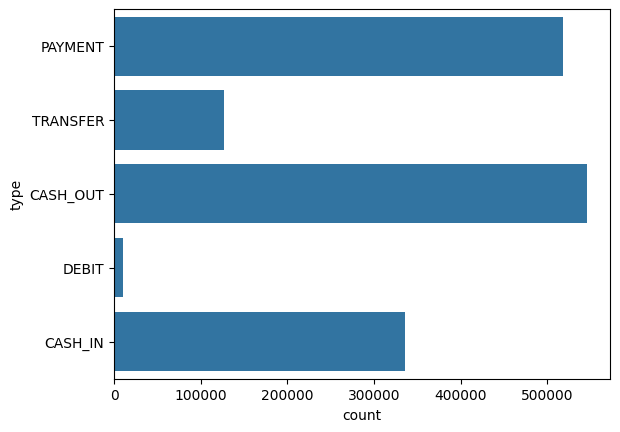

In [ ]:
sns.countplot(data.type) ## for discrete data

## Exploratory Data Analysis

In [ ]:
data.describe(include=['object'])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1536880,1536880,1536880.0,1536880,1536880.0,1536880.0,1536880,1536880.0,1536880.0,1536880.0,1536880.0
unique,153,5,1447003.0,1522707,559222.0,667021.0,651043,876215.0,708044.0,2.0,1.0
top,19,CASH_OUT,10000000.0,C1172626849,0.0,0.0,C985934102,0.0,0.0,0.0,0.0
freq,51352,545415,23.0,4,505633.0,859850.0,100,643616.0,593682.0,1535050.0,1536880.0


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
##coverting categorical features to numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.type =label.fit_transform(data.type)
data.nameOrig=label.fit_transform(data.nameOrig)
data.nameDest=label.fit_transform(data.nameDest)

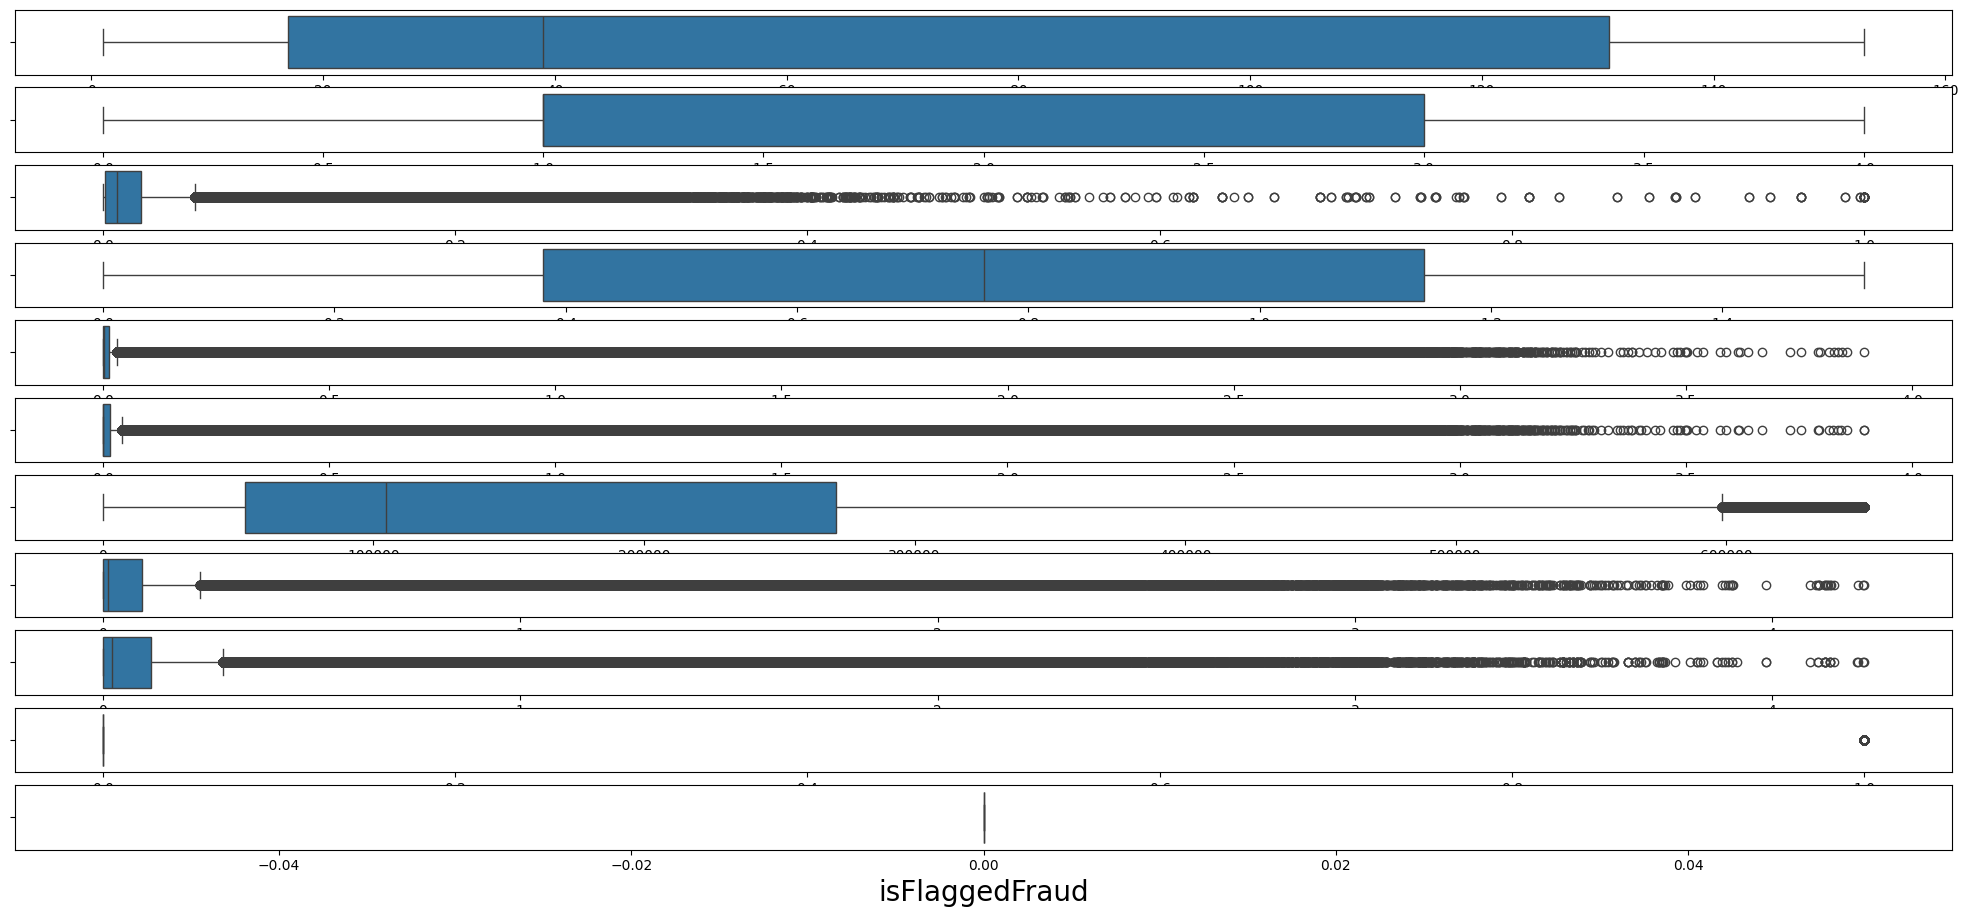

In [ ]:
## checking the outliers if any
## outliers detection can be normally plotted using boxplot
box=data[['step', 'type', 'amount', 'nameOrig',
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,181662,170136.0,160296.36,398047,0.0,0.0,0.0,0.0
1,1,3,1864.28,524959,21249.0,19384.72,415210,0.0,0.0,0.0,0.0
2,1,4,181.0,239928,181.0,0.0,106570,0.0,0.0,1.0,0.0
3,1,1,181.0,1396900,181.0,0.0,94928,21182.0,0.0,1.0,0.0
4,1,3,11668.14,825831,41554.0,29885.86,199982,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536880 entries, 0 to 1536879
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   step            1536880 non-null  object
 1   type            1536880 non-null  int64 
 2   amount          1536880 non-null  object
 3   nameOrig        1536880 non-null  int64 
 4   oldbalanceOrg   1536880 non-null  object
 5   newbalanceOrig  1536880 non-null  object
 6   nameDest        1536880 non-null  int64 
 7   oldbalanceDest  1536880 non-null  object
 8   newbalanceDest  1536880 non-null  object
 9   isFraud         1536880 non-null  object
 10  isFlaggedFraud  1536880 non-null  object
dtypes: int64(3), object(8)
memory usage: 129.0+ MB


## Feature Selection

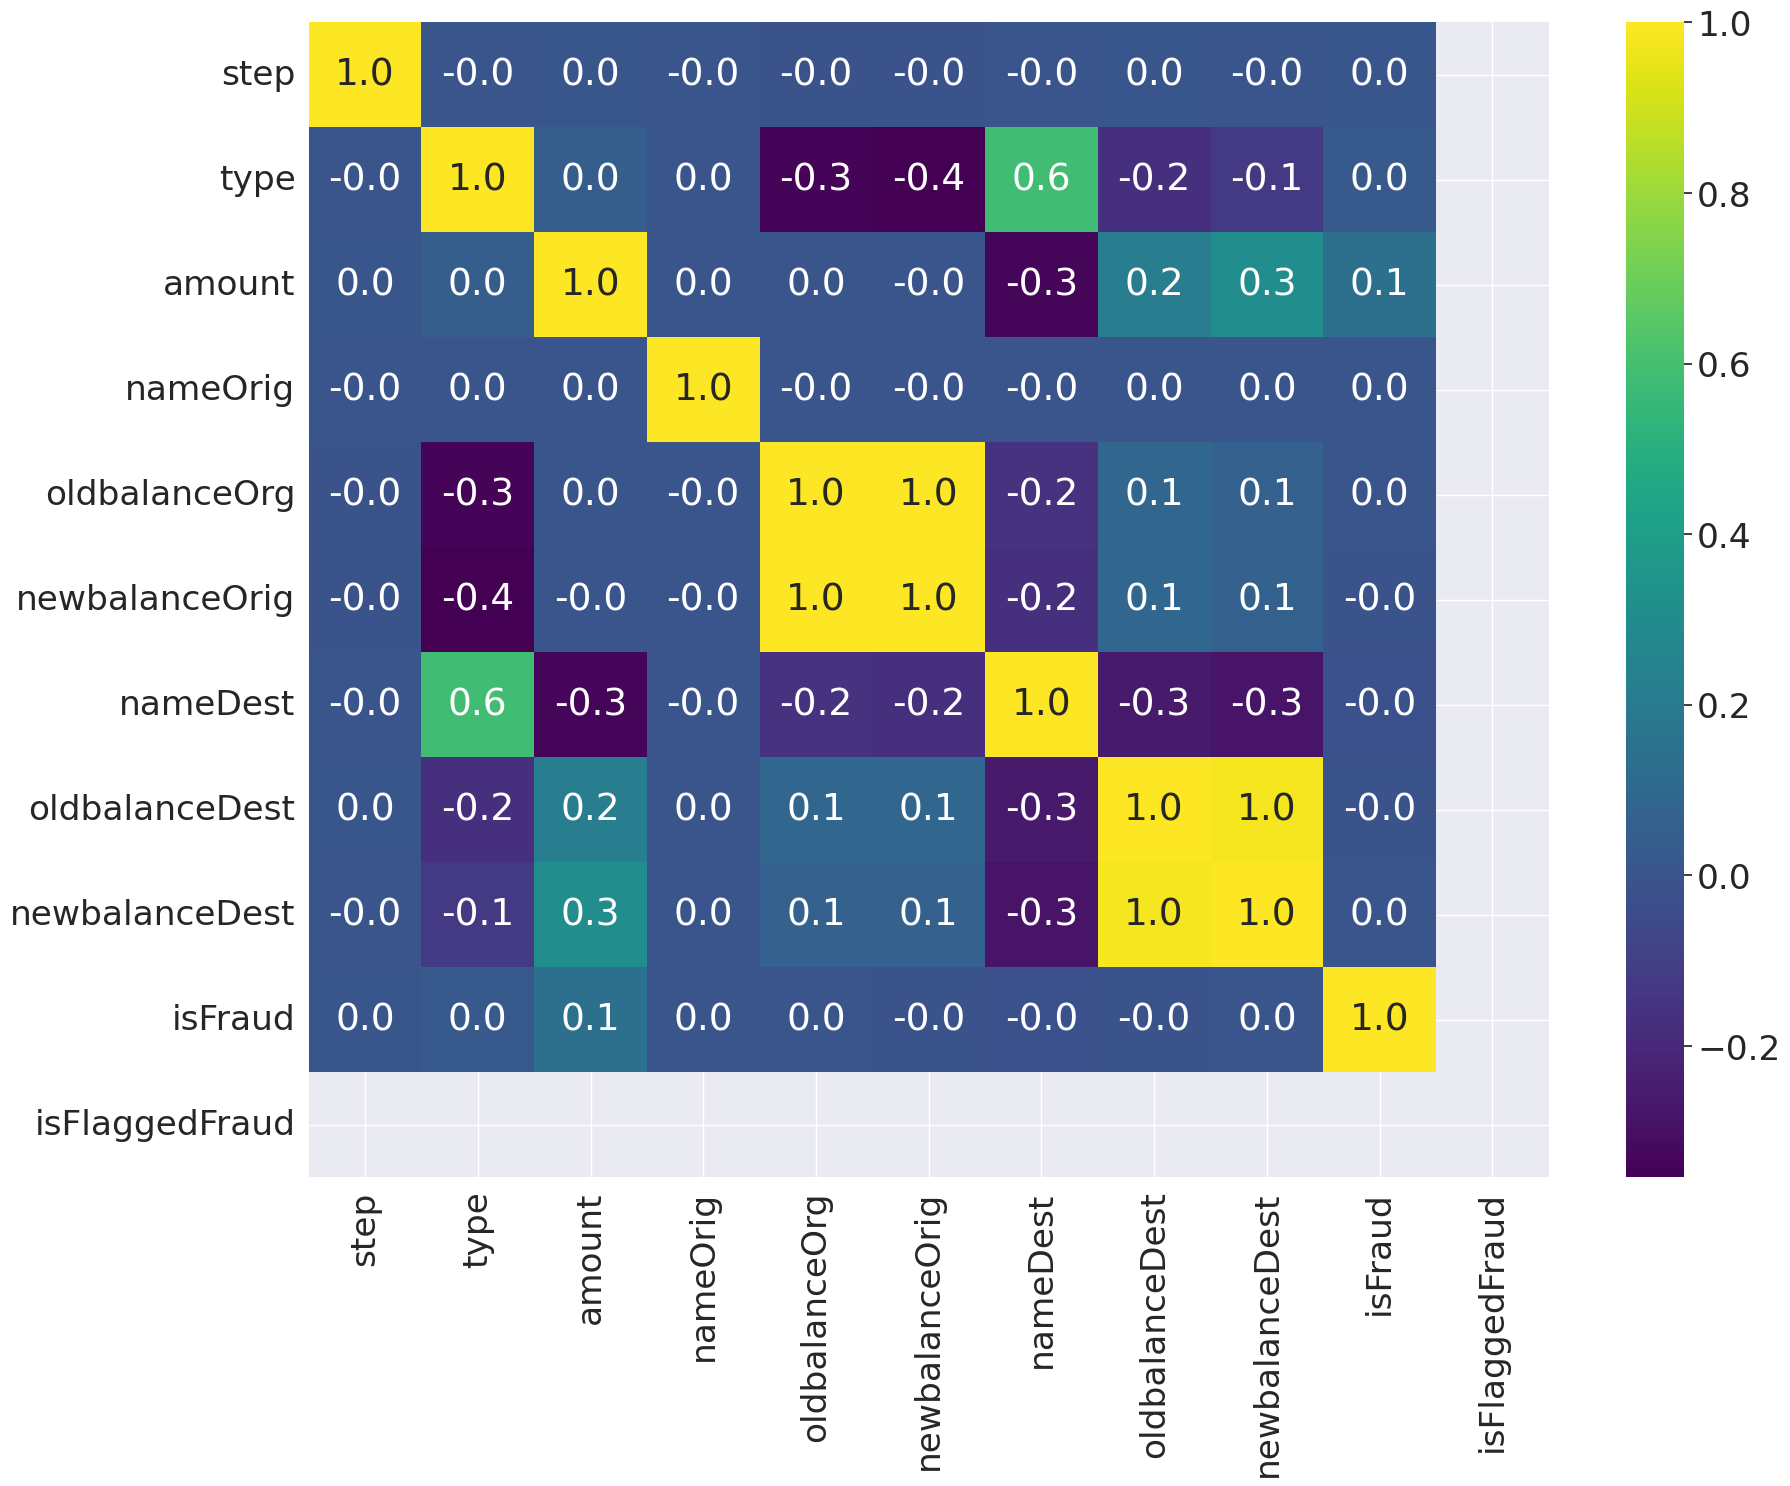

In [51]:
##cmap stands for colormap and it's a colormap instance or registered colormap name
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="viridis")
sns.set(font_scale=2.25)
plt.show()

In [ ]:
## Displays the correlated data
corr_matrix = data.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

step             NaN
type             NaN
amount           NaN
nameOrig         NaN
oldbalanceOrg    NaN
newbalanceOrig   NaN
nameDest         NaN
oldbalanceDest   NaN
newbalanceDest   NaN
isFraud          NaN
isFlaggedFraud   NaN
Name: isFlaggedFraud, dtype: float64

# Model Building

In [ ]:
##Create independent variable (X) and dependent variable (y).
X = data.loc[:,['isFraud','amount','oldbalanceOrg','newbalanceOrig','step','type','nameOrig']]
y = data.isFlaggedFraud

In [ ]:
X.head()

,isFraud,amount,oldbalanceOrg,newbalanceOrig,step,type,nameOrig
0,0.0,9839.64,170136.0,160296.36,1,3,181662
1,0.0,1864.28,21249.0,19384.72,1,3,524959
2,1.0,181.0,181.0,0.0,1,4,239928
3,1.0,181.0,181.0,0.0,1,1,1396900
4,0.0,11668.14,41554.0,29885.86,1,3,825831


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: isFlaggedFraud, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1075816, 7), (461064, 7), (1075816,), (461064,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
dtree.score(X_test, y_test)

1.0

In [ ]:
p_test = dtree.predict(X_test)


In [ ]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [ ]:
mae(p_test, y_test)

0.0

In [ ]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 1.0
mean absolute error(Train): 0.0
mean absolute error(Validation): 0.0


In [ ]:
p_test = dtree.predict(X_test)

In [ ]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])

###  How did you select variables to be included in the model?
Examining the correlation between the target variable and the remaining variablese

###  What are the key factors that predict fraudulent customer?
To identify fraudulent customers, we need to focus on two crucial factors: "isFraud" and "amount".        

###  Do these factors make sense? If yes, How? If not, How not?
Yes, they make sense. If the amount is higher, we can assume it might be fraud. If 'isfraud' is 1, the chances of it being 'FlaggedFraud' are higher.

###  What kind of prevention should be adopted while company update its infrastructure?
To prevent credit card fraud using a machine learning dataset, focus on securing key features like transaction amounts and account balances through encryption and access controls. Enhance data integrity and create derived features to capture transaction patterns. Train the model with balanced historical data, validate its performance, and deploy it for real-time monitoring. Continuously update the model and integrate it with existing fraud detection tools for enhanced detection capabilities.


### Assuming these actions have been implemented, how would you determine if they work?
To determine if the implemented actions to prevent credit card fraud are effective, monitor key performance metrics such as accuracy, precision, recall, F1 score, and the AUC-ROC curve of the machine learning model. Track the rates of false positives and false negatives to balance customer experience and fraud detection. Implement real-time transaction monitoring with feedback loops to refine the model continuously. Assess business metrics like fraud loss reduction and customer satisfaction, and conduct regular audits and reviews to ensure ongoing effectiveness. Compare current performance against baseline metrics to measure improvement and ensure compliance with industry standards like PCI DSS.